## 1. Load data

In [116]:
import glob
import os

import numpy as np
from matplotlib import pyplot as plt
from obspy import UTCDateTime

freq0 = 1.
corr_len = 2
std_model = 0.012

infile = glob.glob(
    f'/home/pm/Documents_sync/PhD/StHelens/spatial/synthetic_test_dvfilt_allcc_cl{corr_len}_std{std_model}_largemap/{freq0}-{freq0*2}/dvdt_3D.npz')[0]


outfolder = os.path.join(os.path.dirname(os.path.dirname(infile)), 'figures')
os.makedirs(outfolder, exist_ok=True)

loaded = np.load(infile)

x = loaded['xaxis']
y = loaded['yaxis']
t = loaded['taxis']
dvdt = loaded['dv']
statx = loaded['statx']
staty = loaded['staty']
# No data anymore from this date on
start = 0  # 4 for february # Start here for February
start = np.argmin(abs(t - UTCDateTime('2007-06-01').timestamp))
end = -1
# note that this are rows -> latitude, columns -> longitude, pages -> time
dvdt = dvdt[:,:,start:]
t = t[start:]

dv_total = dvdt[:, :, -1]
dv = np.nan_to_num(dvdt)

utcs = [UTCDateTime(tt) for tt in t]
datetimes = [utci.datetime for utci in utcs]


In [117]:
from obspy.geodetics import degrees2kilometers, locations2degrees
lat = [46.05, 46.36]
lon = [-122.45, -122.03]


# Y-extent
y2 = degrees2kilometers(lat[1]- lat[0])

# X-Extent
x2 = degrees2kilometers(locations2degrees(lat[0], lon[0], lat[0], lon[1]))
chkb2 = np.zeros_like(dv_total)
for ii, yy in enumerate(np.arange(y2+1)):
    chkb2[ii, :] = np.sin(
        4*np.pi*np.arange(x2/1+1)/(x2/1)) + np.cos(4*np.pi*yy/(y2))




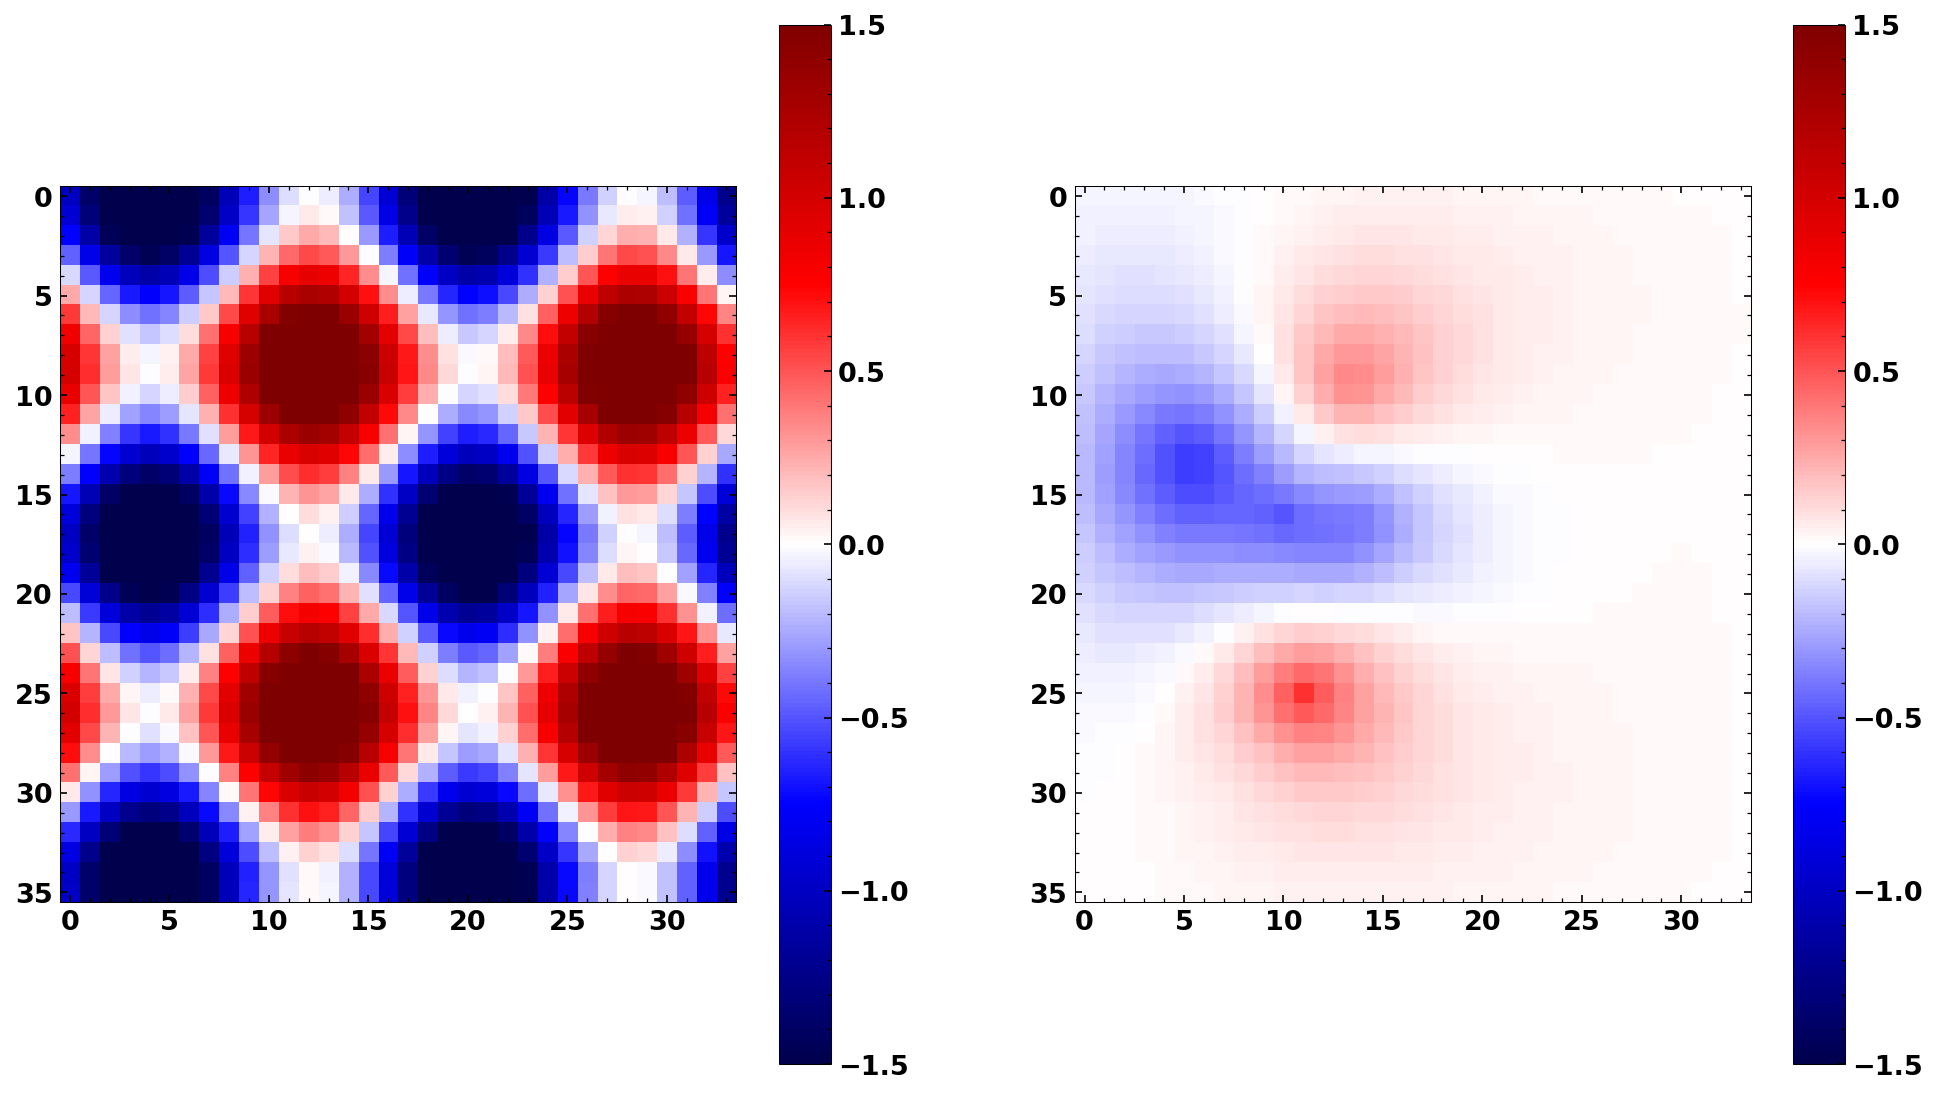

In [118]:
# show synthetic model


plt.figure(figsize=(16, 9))
plt.subplot(121)
plt.imshow(-chkb2, cmap='seismic', vmin=-1.5, vmax=1.5)
plt.colorbar()
plt.subplot(122)
plt.imshow(dv[:,:,-61]*-100, cmap='seismic', vmin=-1.5, vmax=1.5)
plt.colorbar()